In [1]:
# @title Подключение библиотек
import geopandas
import pandas
import numpy
import shapely
%pip install -U mapclassify
import mapclassify

# Чертёж парка, по которому происходит построение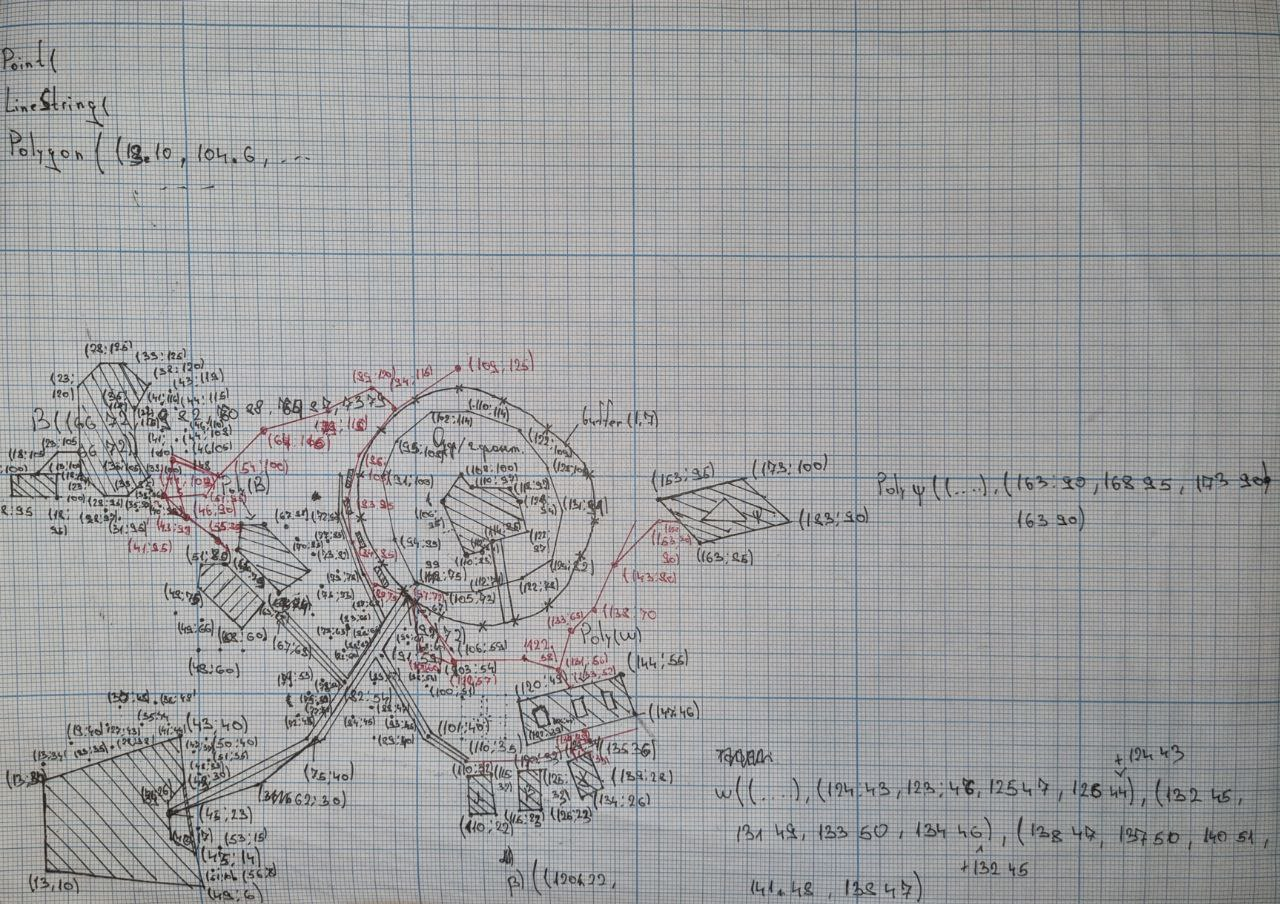

In [2]:
# @title Создание объектов парка и перенос их на карту

data = {'type': ["tree", "tree", "tree", "tree", "tree", "tree",
                 "tree", "tree", "tree", "tree", "tree", "tree", "tree", "tree", "tree",
                  "path", "path", "set_of_trees", "set_of_trees", "set_of_trees", "set_of_trees", "set_of_trees",
                  "lake", "museum", "restaurant", "mansion", "fastfood", "toilets", "path", "path", "path", "path", "path", "Territory"],
        'name': ["birch", "birch", "birch", "birch", "birch", "birch",
                 "birch", "birch", "birch", "birch", "birch",  "birch",  "birch",  "birch",  "birch",
                 "main path","restaurant's path", "birch thicket", "birch thicket", "birch thicket", "birch thicket", "pine thicket",
                 "lake 'Banya'", "Bathhouse Museum", "Fancy Restaurant", "Government Secret mansion", "fastfood restaurants", "men's & women's toilets",
                 "secret path", "path to the lake", "lake path", "path to the concert hall", "path to the toilet's", "Concert hall territory"]}
df = pandas.DataFrame(data)

wkts = ['POINT(23 35)', 'POINT(30 48)', 'POINT(50 40)', 'POINT(47 37)', 'POINT(51 35)', 'POINT(48 31)', 'POINT(53 15)', 'POINT(51 10)', 'POINT(35 44)', 'POINT(41 44)',
        'POINT(19 40)', 'POINT(13 34)', 'POINT(27 43)', 'POINT(28 38)', 'POINT(38 48)',
        'MULTILINESTRING((47 23, 62 30, 75 40, 97 72), (83 52, 67 68), (90 62, 101 40, 110 35))',
        "MULTILINESTRING((111 35, 124 35, 147 43), (135 39, 134 42), (124 35, 124 33), (115 35, 112 32), (134 38, 134 36))",
        "MULTIPOINT((75 75), (79 78), (73 82), (70 85), (77 85), (72 90), (67 88))",
        'MULTIPOINT((72 45), (77 48), (75 50), (77 54), (71 53))',
        'MULTIPOINT((89 40), (84 45), (93 45), (88 47), (89 52))',
        'MULTIPOINT((100 51), (103 54), (98 54), (106 61), (100 60), (96 61), (102 67))',
        'MULTIPOINT((82 60), (85 62), (85 65), (79 63), (83 65), (87 68))',
        'POLYGON((105 73, 99 75, 94 85, 91 100, 95 108, 102 114, 110 114, 122 109, 128 101, 131 91, 129 82, 122 78, 112 71, 105 73), (110 83, 106 95, 108 100, 110 97, 118 97, 121 94, 122 87, 114 85, 112 84, 110 83))',
        'POLYGON((13 10, 49 6, 43 40, 13 30, 13 10), (45 14, 40 17, 39 26, 43 30, 45 14))',
        'POLYGON((122 39, 120 49, 144 55, 147 46, 122 39), (124 43, 123 46, 125 47, 126 44, 124 43), (132 45, 131 49, 133 50, 134 46, 132 45), (138 47, 137 50, 140 51, 141 48, 138 47))',
        "POLYGON((163 85, 153 95, 173 100, 183 90, 163 85), (163 90, 168 95, 173 90, 163 90))",
        'MULTIPOLYGON(((110 22, 115 22, 115 32, 110 32, 110 22)), ((120 23, 125 23, 125 33, 120 33 ,120 23)), ((134 26, 139 28, 135 36, 130 34, 134 26)))',
        'MULTIPOLYGON(((58 63, 49 75, 51 80, 56 79, 63 70, 58 63)), ((66 72, 59 82, 60 88, 64 87, 73 79, 66 72)))',
        "LINESTRING(133 53, 131 56, 133 68, 138 70, 143 80, 153 90, 158 90)",
        "LINESTRING(131 56, 122 58, 110 57, 102 60, 97 72)",
        "LINESTRING(97 72, 89 75, 84 85, 83 95, 86 105, 94 115, 109 125)",
        "LINESTRING(94 115, 89 120, 79 115, 64 110, 54 100, 38 105)",
        "LINESTRING(54 100, 51 97, 41 95, 43 92, 46 90, 55 83)",
        "GEOMETRYCOLLECTION(MULTIPOINT((46 105), (44 108), (46 110), (44 115), (43 119), (41 116), (38 115), (41 110), (38 92), (35 93), (40 94), (31 91), (28 92)),\
         POLYGON((38 100, 33 95, 28 95, 23 100, 23 120, 28 125, 33 125, 38 120, 35 115, 35 105, 38 100)), LINESTRING(23 105, 18 105, 13 100), POLYGON((18 95, 8 95, 8 100, 18 100, 18 95)))"]

x_delta = 413750
y_delta = 6179150

geom = geopandas.GeoSeries.from_wkt(wkts, crs = 32637)
geom = geom.translate(xoff= x_delta, yoff= y_delta)

geodf = geopandas.GeoDataFrame(data = df, geometry = geom)

geodf['geometry'] = numpy.where(geodf['type'] == 'tree', geodf.geometry.buffer(1), geodf.geometry)
geodf['geometry'] = numpy.where(geodf['type'] == 'path', geodf.geometry.buffer(0.5), geodf.geometry)
geodf['geometry'] = numpy.where(geodf['type'] == 'set_of_trees', geodf.geometry.buffer(1), geodf.geometry)
geodf['geometry'] = numpy.where(geodf['type'] == 'lake', geodf.geometry.buffer(1.7), geodf.geometry)

geodf.explore(max_zoom = 20)

/usr/local/lib/python3.10/dist-packages/folium/features.py:1102: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'type': 'Territory', 'name': 'Concert hall territory'}] to MultiPolygon for full functionality.
https://tools.ietf.org/html/rfc7946#page-9
  warnings.warn(


In [3]:
# @title Создание объектов из существующих парков, выравнивание их координат и добавление в GeoDataFrame
#Объекты брал по ссылке 'https://godintonhouse.co.uk/map/'
# Номера взятых объектов согласно источнику - 1, 4, 11

# Создание и добавление объекта Pan Garden
some_df = shapely.Polygon([(109, 38), (119, 38), (119, 48), (109, 48), (109, 38)])
point_df = shapely.Point([114, 43]).buffer(1.5)
firstline_df = shapely.LineString([(109, 43), (119, 43)])
secondline_df = shapely.LineString([(114 , 38), (114, 48)])
obj_df = shapely.ops.unary_union([point_df, firstline_df, secondline_df]).buffer(0.7)
square_df = some_df.difference(obj_df)
square_df = shapely.transform(square_df, lambda x: x + [x_delta, y_delta])

square_info= {'type' : 'garden', 'name': "Pan Garden", "geometry": square_df}
geodf = geodf.append(square_info, ignore_index=True)

# Создание и добавление объекта Rose Garden
rectangle_poly_df = shapely.Polygon([(0, 0), (0, 15), (10, 15), (10, 0), (0, 0)])
half_circle_df = shapely.Point([10, 7.5]).buffer(5.5)
first_part_df = shapely.ops.unary_union([rectangle_poly_df, half_circle_df])
circle_del_df = shapely.Point([10, 7.5]).buffer(3.5)
straight_line_del_df = shapely.LineString([(0, 7.5), (10, 7.5)])
cross1_line_del_df = shapely.LineString([(0, 15), (10, 7.5)])
cross2_linr_del_df = shapely.LineString([(0, 0), (10, 7.5)])
to_del_df = shapely.ops.unary_union([circle_del_df, straight_line_del_df, cross1_line_del_df, cross2_linr_del_df]).buffer(0.7)
rose_df = first_part_df.difference(to_del_df)
rose_df = shapely.transform(rose_df, lambda x: x + [146 + x_delta, 65 + y_delta])

rose_info = {'type': "garden", "name" : 'Rose Garden', "geometry": rose_df}
geodf = geodf.append(rose_info, ignore_index = True)

# Создание и добавление объекта Italian Garden
main_line_df = shapely.LineString([(0, 0), (11, 6)])
main_part_df = main_line_df.buffer(6)
main_del_df = main_line_df.buffer(3.8)
line_add = main_line_df.buffer(0.7)
main_with_del_df = main_part_df.difference(main_del_df)
italian_df = shapely.ops.unary_union([main_with_del_df, line_add])
italian_df = shapely.transform(italian_df, lambda x: x + [68 + x_delta, 25 + y_delta])

italian_info = {'type' : "garden", "name": "Italian Garden", "geometry" : italian_df}
geodf = geodf.append(italian_info, ignore_index = True)


geodf.explore(max_zoom = 25)

<ipython-input-3-e38231dcafab>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geodf = geodf.append(square_info, ignore_index=True)
<ipython-input-3-e38231dcafab>:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geodf = geodf.append(rose_info, ignore_index = True)
<ipython-input-3-e38231dcafab>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  geodf = geodf.append(italian_info, ignore_index = True)
/usr/local/lib/python3.10/dist-packages/folium/features.py:1102: UserWarning: GeoJsonTooltip is not configured to render for GeoJson GeometryCollection geometries. Please consider reworking these features: [{'type': 'Territory', 'name': 'Concert hall territory'}] to MultiPolygon for full functionality.
https://tools.ietf.org/h